<a href="https://colab.research.google.com/github/sunju2472/back/blob/master/psj202215037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
 # 파일 업로드 창을띄우고, 선택된파일을업로드합니다.
uploaded = files.upload()

Saving psj_air.csv to psj_air.csv


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,843 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# 업로드된 파일 읽기
df = pd.read_csv('psj_air.csv', encoding='UTF-8')
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [ ]:
df.rename(columns={'측정일시':'Date/Time','측정소명':'Location','이산화질소농도(ppm)':'NO2', '오존농도(ppm)':'O3','일산화탄소농도(ppm)':'CO','아황산가스(ppm)':'SO2','미세먼지(㎍/㎥)':'Fine Dust','초미세먼지(㎍/㎥)':'Ultrafine Dust'}, inplace=True)
df.head()

,Date/Time,Location,NO2,O3,CO,SO2,Fine Dust,Ultrafine Dust
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [ ]:
print(df.isnull().sum())
df = df.interpolate()
print(df.isnull().sum())

Date/Time          0
Location           0
NO2               38
O3                42
CO                42
SO2               38
Fine Dust         59
Ultrafine Dust    64
dtype: int64
Date/Time         0
Location          0
NO2               0
O3                0
CO                0
SO2               0
Fine Dust         0
Ultrafine Dust    0
dtype: int64


<ipython-input-3-6878e8f9bf34>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


In [ ]:
df = pd.get_dummies(df, columns=['Location'])
df.head()

,Date/Time,NO2,O3,CO,SO2,Fine Dust,Ultrafine Dust,Location_강남구,Location_강동구,Location_강북구,...,Location_성동구,Location_성북구,Location_송파구,Location_양천구,Location_영등포구,Location_용산구,Location_은평구,Location_종로구,Location_중구,Location_중랑구
0,201711242300,0.038,0.004,0.4,0.005,16.0,10.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,201711242200,0.031,0.008,0.4,0.005,17.0,9.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,201711242100,0.025,0.012,0.4,0.005,18.0,11.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,201711242000,0.033,0.007,0.4,0.005,21.0,12.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,201711241900,0.033,0.008,0.4,0.005,20.0,10.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['Target'] = df['Fine Dust']
df.drop(['Fine Dust'],axis=1,inplace=True)
df.head()

,Date/Time,NO2,O3,CO,SO2,Ultrafine Dust,Location_강남구,Location_강동구,Location_강북구,Location_강서구,...,Location_성북구,Location_송파구,Location_양천구,Location_영등포구,Location_용산구,Location_은평구,Location_종로구,Location_중구,Location_중랑구,Target
0,201711242300,0.038,0.004,0.4,0.005,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,16.0
1,201711242200,0.031,0.008,0.4,0.005,9.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,17.0
2,201711242100,0.025,0.012,0.4,0.005,11.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,18.0
3,201711242000,0.033,0.007,0.4,0.005,12.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,21.0
4,201711241900,0.033,0.008,0.4,0.005,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,20.0


In [ ]:
Q1 = df['Target'].quantile(0.25)
Q3 = df['Target'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Target'] >= lower_bound) & (df['Target'] <= upper_bound)]


이상치 제거 후 Target 변수 통계:
count    4072.000000
mean       33.632981
std        15.383745
min         5.000000
25%        22.000000
50%        29.000000
75%        44.000000
max        82.000000
Name: Target, dtype: float64


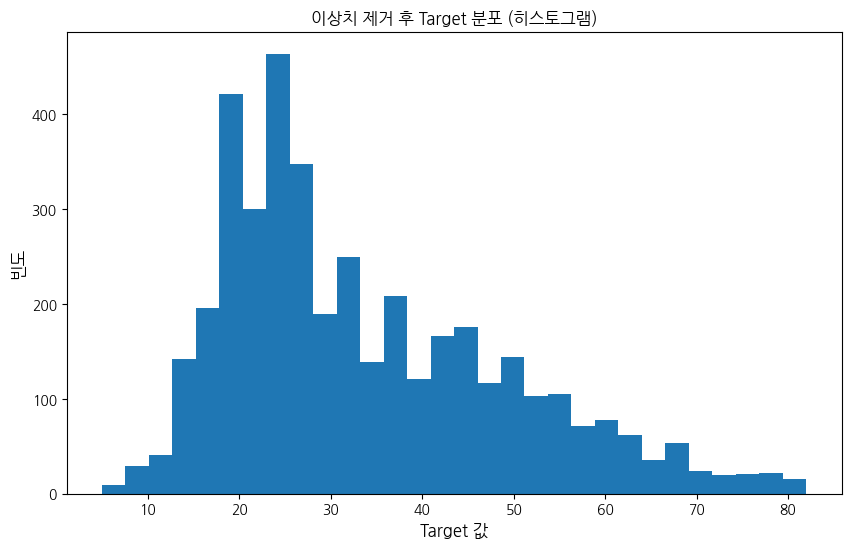

In [ ]:
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

print("\n이상치 제거 후 Target 변수 통계:")
print(df['Target'].describe())

fig, ax = plt.subplots(figsize=(10, 6))
df['Target'].plot(kind='hist', bins=30, ax=ax)
ax.set_title('이상치 제거 후 Target 분포 (히스토그램)', fontproperties=font_prop)
ax.set_xlabel('Target 값', fontproperties=font_prop)
ax.set_ylabel('빈도', fontproperties=font_prop)
plt.show()

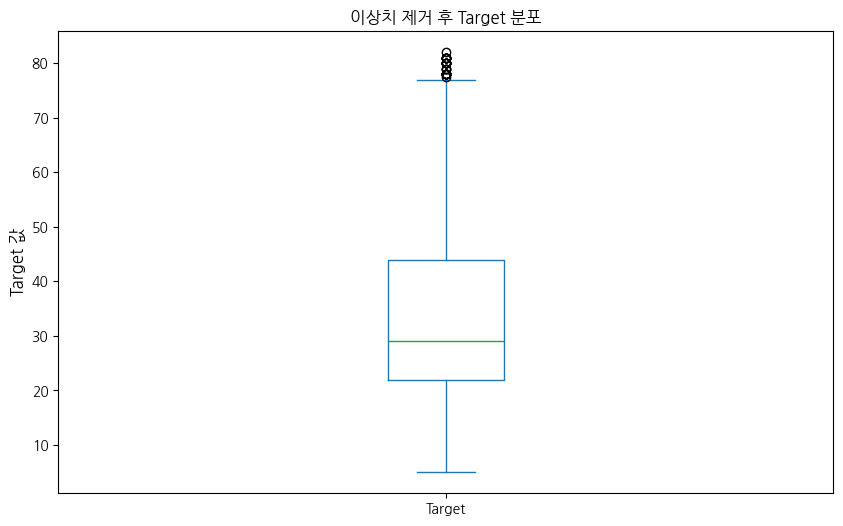

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df['Target'].plot(kind='box', ax=ax)
ax.set_title('이상치 제거 후 Target 분포', fontproperties=font_prop)
ax.set_ylabel('Target 값', fontproperties=font_prop)
plt.show()

원본 Target과 정규화된 Target의 처음 5개 값:
   Target  Normalized_Target
0    16.0           0.142857
1    17.0           0.155844
2    18.0           0.168831
3    21.0           0.207792
4    20.0           0.194805


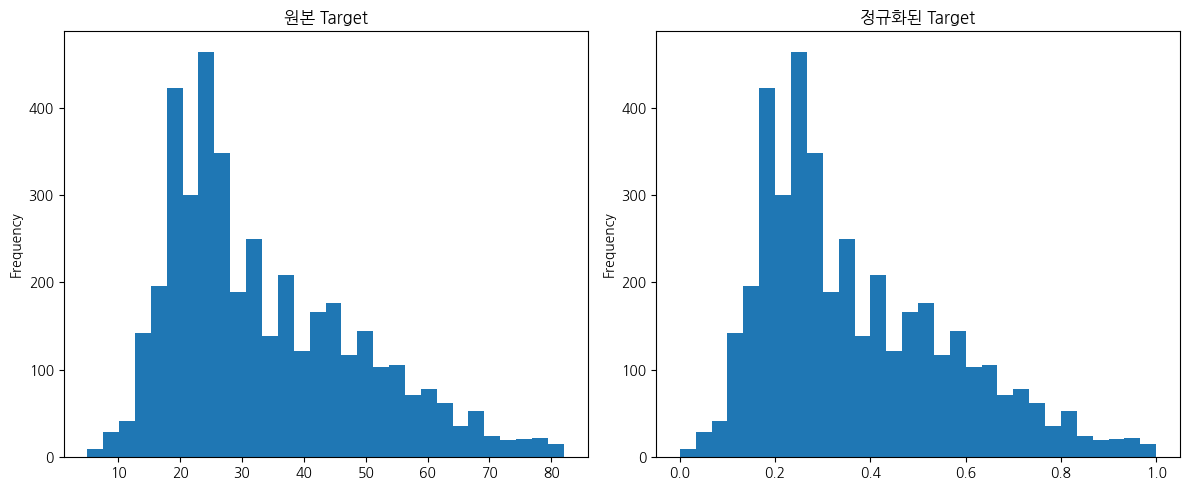


정규화된 Target의 범위:
최소값: 0.0
최대값: 1.0


In [ ]:
min_target = df['Target'].min()
max_target = df['Target'].max()

df['Normalized_Target'] = (df['Target'] - min_target) / (max_target - min_target)

print("원본 Target과 정규화된 Target의 처음 5개 값:")
print(df[['Target', 'Normalized_Target']].head())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

df['Target'].plot(kind='hist', bins=30, ax=ax1)
ax1.set_title('원본 Target', fontproperties=font_prop)

df['Normalized_Target'].plot(kind='hist', bins=30, ax=ax2)
ax2.set_title('정규화된 Target', fontproperties=font_prop)

plt.tight_layout()
plt.show()

# 정규화된 Target의 범위 확인
print("\n정규화된 Target의 범위:")
print(f"최소값: {df['Normalized_Target'].min()}")
print(f"최대값: {df['Normalized_Target'].max()}")

In [ ]:
df.head()

,Date/Time,NO2,O3,CO,SO2,Ultrafine Dust,Location_강남구,Location_강동구,Location_강북구,Location_강서구,...,Location_송파구,Location_양천구,Location_영등포구,Location_용산구,Location_은평구,Location_종로구,Location_중구,Location_중랑구,Target,Normalized_Target
0,201711242300,0.038,0.004,0.4,0.005,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,16.0,0.142857
1,201711242200,0.031,0.008,0.4,0.005,9.0,True,False,False,False,...,False,False,False,False,False,False,False,False,17.0,0.155844
2,201711242100,0.025,0.012,0.4,0.005,11.0,True,False,False,False,...,False,False,False,False,False,False,False,False,18.0,0.168831
3,201711242000,0.033,0.007,0.4,0.005,12.0,True,False,False,False,...,False,False,False,False,False,False,False,False,21.0,0.207792
4,201711241900,0.033,0.008,0.4,0.005,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,20.0,0.194805


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Target', axis=1))

# PCA 수행
pca = PCA(n_components=2)
pca.fit(X_scaled)
변환된_데이터 = pca.transform(X_scaled)

# 변환된 데이터 출력 (소수점 둘째 자리까지)
print("\n=== 변환된 데이터 ===")
print("  제1주성분 제2주성분")

print(np.round(변환된_데이터, 2))

설명력 = pca.explained_variance_ratio_

print("\n=== PCA 설명력 ===")
print(f"제1주성분의설명력: {설명력[0]:.2%}")
print(f"제2주성분의설명력: {설명력[1]:.2%}")


=== 변환된 데이터 ===
  제1주성분 제2주성분
[[-0.24  1.3 ]
 [-0.63  1.3 ]
 [-0.88  1.23]
 ...
 [-0.03  1.44]
 [-0.14  1.3 ]
 [ 2.21  1.78]]

=== PCA 설명력 ===
제1주성분의설명력: 11.11%
제2주성분의설명력: 5.49%


In [ ]:
df.head()

,Date/Time,NO2,O3,CO,SO2,Ultrafine Dust,Location_강남구,Location_강동구,Location_강북구,Location_강서구,...,Location_송파구,Location_양천구,Location_영등포구,Location_용산구,Location_은평구,Location_종로구,Location_중구,Location_중랑구,Target,Normalized_Target
0,201711242300,0.038,0.004,0.4,0.005,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,16.0,0.142857
1,201711242200,0.031,0.008,0.4,0.005,9.0,True,False,False,False,...,False,False,False,False,False,False,False,False,17.0,0.155844
2,201711242100,0.025,0.012,0.4,0.005,11.0,True,False,False,False,...,False,False,False,False,False,False,False,False,18.0,0.168831
3,201711242000,0.033,0.007,0.4,0.005,12.0,True,False,False,False,...,False,False,False,False,False,False,False,False,21.0,0.207792
4,201711241900,0.033,0.008,0.4,0.005,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,20.0,0.194805


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score

y = df['Target'].values
features_col = [i for i in list(df.columns) if i != 'Target']
x = df.loc[:, features_col].values


x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse:.4f}")
print(f"R² 점수: {r2:.4f}")

print("회귀식:")
coefficients = model.coef_
intercept = model.intercept_

for i in range(len(features_col)):
    print(f"{coefficients[i]:.4f} * {features_col[i]}", end=' + ')
print(f"{intercept:.4f} (절편)")

평균 제곱 오차 (MSE): 0.0000
R² 점수: 1.0000
회귀식:
-0.0000 * Date/Time + -0.0000 * NO2 + -0.0000 * O3 + -0.0000 * CO + 0.0000 * SO2 + -0.0000 * Ultrafine Dust + -0.0000 * Location_강남구 + 0.0000 * Location_강동구 + 0.0000 * Location_강북구 + 0.0000 * Location_강서구 + -0.0000 * Location_관악구 + 0.0000 * Location_광진구 + -0.0000 * Location_구로구 + 0.0000 * Location_금천구 + -0.0000 * Location_노원구 + 0.0000 * Location_도봉구 + -0.0000 * Location_동대문구 + 0.0000 * Location_동작구 + 0.0000 * Location_마포구 + -0.0000 * Location_서대문구 + 0.0000 * Location_서초구 + -0.0000 * Location_성동구 + -0.0000 * Location_성북구 + 0.0000 * Location_송파구 + 0.0000 * Location_양천구 + -0.0000 * Location_영등포구 + 0.0000 * Location_용산구 + -0.0000 * Location_은평구 + -0.0000 * Location_종로구 + 0.0000 * Location_중구 + -0.0000 * Location_중랑구 + 77.0000 * Normalized_Target + 5.0001 (절편)


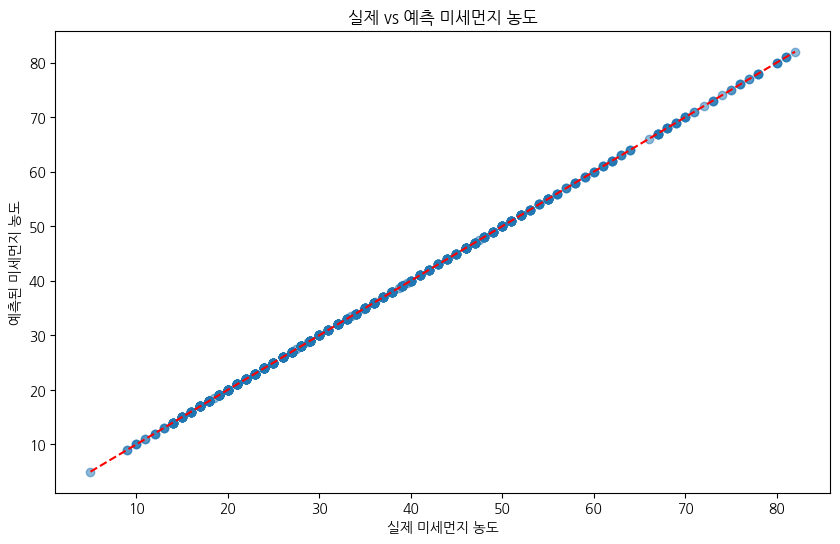

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # y=x 선 추가
plt.xlabel('실제 미세먼지 농도')
plt.ylabel('예측된 미세먼지 농도')
plt.title('실제 vs 예측 미세먼지 농도')
plt.show()

In [ ]:
df.head()

,Date/Time,NO2,O3,CO,SO2,Ultrafine Dust,Location_강남구,Location_강동구,Location_강북구,Location_강서구,...,Location_송파구,Location_양천구,Location_영등포구,Location_용산구,Location_은평구,Location_종로구,Location_중구,Location_중랑구,Target,Normalized_Target
0,201711242300,0.038,0.004,0.4,0.005,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,16.0,0.142857
1,201711242200,0.031,0.008,0.4,0.005,9.0,True,False,False,False,...,False,False,False,False,False,False,False,False,17.0,0.155844
2,201711242100,0.025,0.012,0.4,0.005,11.0,True,False,False,False,...,False,False,False,False,False,False,False,False,18.0,0.168831
3,201711242000,0.033,0.007,0.4,0.005,12.0,True,False,False,False,...,False,False,False,False,False,False,False,False,21.0,0.207792
4,201711241900,0.033,0.008,0.4,0.005,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,20.0,0.194805


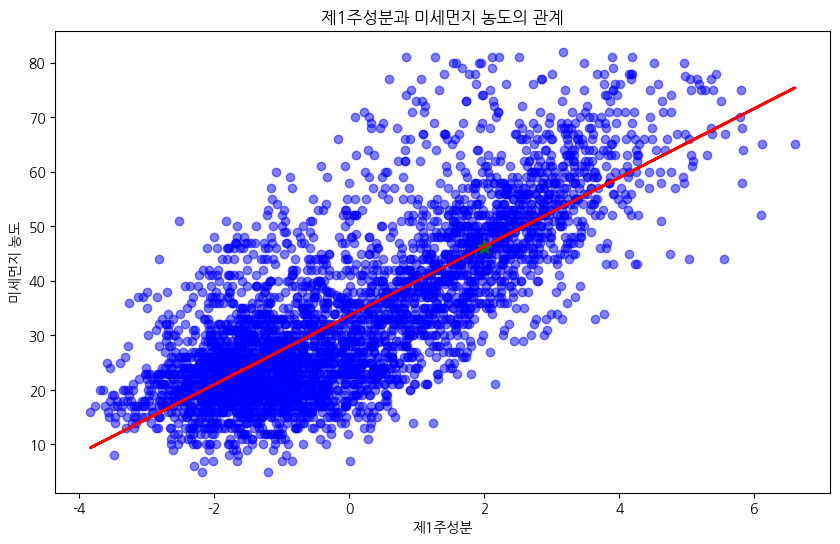

평균 제곱 오차 (MSE): 94.3777
R² 점수: 0.6011
제1주성분이 2.0일 때 예상 미세먼지 농도: 46.3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X = 변환된_데이터[:, 0].reshape(-1, 1)  # 제1주성분
y = df['Target'].values

model = LinearRegression()
model.fit(X, y)

예측_주성분 = [[2.0]]
예측_미세먼지 = model.predict(예측_주성분)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.scatter(예측_주성분, 예측_미세먼지, color='green', s=100, marker='*')
plt.xlabel('제1주성분')
plt.ylabel('미세먼지 농도')
plt.title('제1주성분과 미세먼지 농도의 관계')
plt.show()

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"평균 제곱 오차 (MSE): {mse:.4f}")
print(f"R² 점수: {r2:.4f}")
print(f"제1주성분이 {예측_주성분[0][0]}일 때 예상 미세먼지 농도: {예측_미세먼지[0]:.1f}")